In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Documents/cleaning.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(columns=['day','month','year'],inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
X=df.drop(columns=['FWI'])
y=df['FWI']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# feature selection 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [12]:
import matplotlib.pyplot as plt

<Axes: >

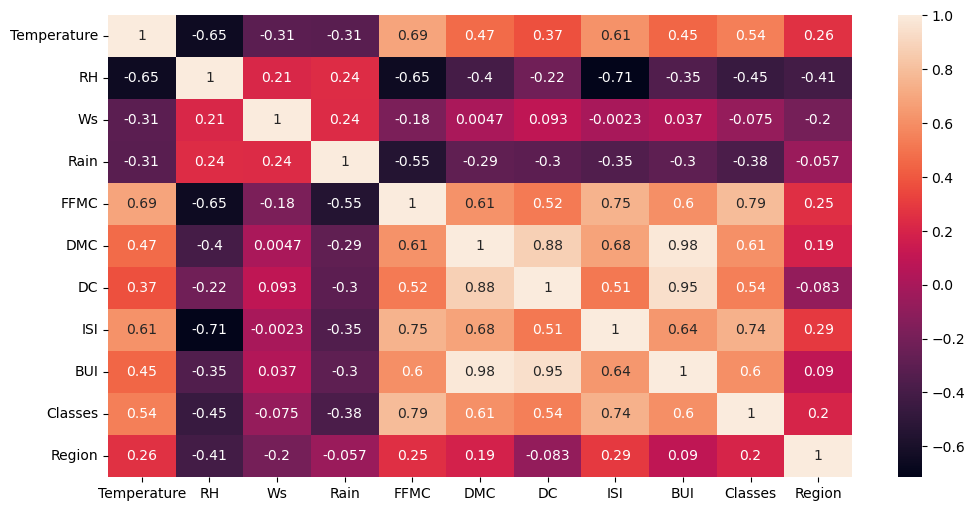

In [13]:
plt.figure(figsize=(12,6))
correlation=X_train.corr()
sns.heatmap(correlation,annot=True)

In [14]:
correlation

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [15]:
def remove_feature(df,threshold):
    seen=set()
    lst=df.columns.to_list()
    for i in range(len(lst)):
        for j in range(i+1,len(lst)):
            if df[lst[i]].corr(df[lst[j]])>threshold:
                seen.add(lst[j])
    return seen
                
            
            

In [16]:
lst=remove_feature(X_train,0.90)

In [17]:
lst

{'BUI'}

In [18]:
lst=df.columns.to_list()

In [19]:
df[lst[0]].corr(df[lst[1]])

-0.6514003387092417

In [20]:
X_train.drop(columns=lst,inplace=True)
X_test.drop(columns=lst,inplace=True)

KeyError: "['FWI'] not found in axis"

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

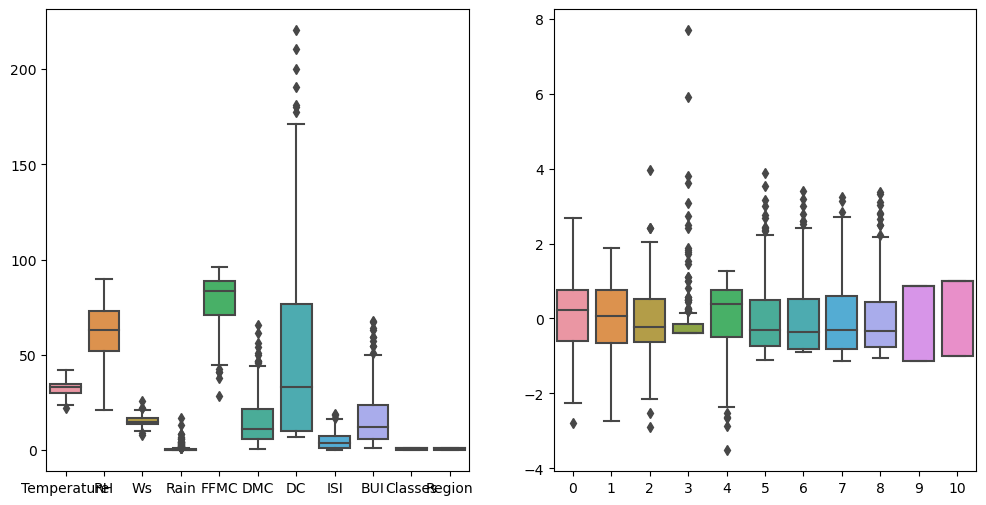

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled);

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score


In [33]:
model=LinearRegression()

In [34]:
model.fit(X_train_scaled,y_train)

LinearRegression()

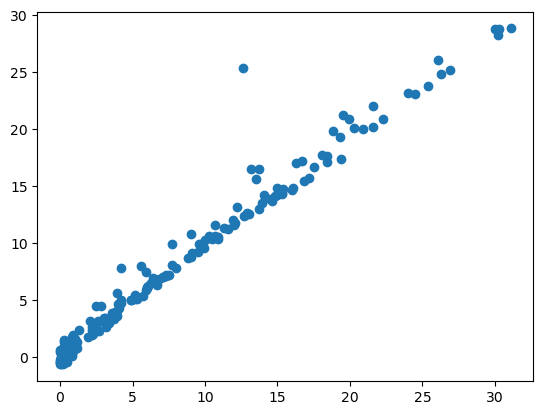

In [35]:
plt.scatter(y_train,model.predict(X_train_scaled))

In [36]:
y_pred=model.predict(X_test_scaled)

In [37]:
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rsme",root_mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 0.42675206146898664
mse 0.3323111538486409
rsme 0.5764643560955359
r2 0.9890356825759856


In [38]:
# ridge

In [39]:
ridge_model=Ridge()
ridge_model.fit(X_train_scaled,y_train)
y_pred=ridge_model.predict(X_test_scaled)
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rsme",root_mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 0.4634859812027447
mse 0.4694114296441619
rsme 0.6851360665182953
r2 0.98451217824779


In [40]:
import pickle

In [41]:
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(ridge_model,open('ridge.pkl','wb'))

In [95]:
lasso_model=Lasso()
lasso_model.fit(X_train_scaled,y_train)
y_pred=lasso_model.predict(X_test_scaled)
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rsme",root_mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 1.0025429078243877
mse 1.6971373316475613
rsme 1.3027422353050357
r2 0.944004430182912


In [97]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.97370989,  0.14296159,  4.06374135,  0.        , -0.        ])

In [98]:
lasso_model.intercept_

7.420103092783505

In [100]:
from sklearn.linear_model import LassoCV,RidgeCV

In [101]:
model=LassoCV(cv=5)

In [102]:
model.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [103]:
y_pred=model.predict(X_test)

C:\Users\jessy pinkman\.conda\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [105]:
model.alpha_

0.03561740568478506

In [109]:
model.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

In [110]:
model.max_iter

1000